# NYC Flight Data Analysis

In [1]:
pwd

'F:\\UPX\\Week_1\\Final'

In [2]:
your_local_path="F:/UPX/Week_1/Final/Project Datasets/"

In [48]:
#Importing the necessary libraries required for numerical computation,plotting and visualization
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling
import warnings
warnings.filterwarnings('ignore')
import datetime

In [4]:
flights = pd.read_csv(your_local_path+'flight_data.csv')

In [5]:
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01-01-2013 06:00


In [6]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
year              336776 non-null int64
month             336776 non-null int64
day               336776 non-null int64
dep_time          328521 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         328521 non-null float64
arr_time          328063 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         327346 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           334264 non-null object
origin            336776 non-null object
dest              336776 non-null object
air_time          327346 non-null float64
distance          336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
dtypes: float64(5), int64(9), object(5)
memory usage: 48.8+ MB


In [7]:
flights.shape

(336776, 19)

In [8]:
#The column year has a constant value and hence do not make any significance in our analysis
flights.drop(['year'],axis=1,inplace=True)

In [9]:
flights['dep_time'].describe()

count    328521.000000
mean       1349.109947
std         488.281791
min           1.000000
25%         907.000000
50%        1401.000000
75%        1744.000000
max        2400.000000
Name: dep_time, dtype: float64

In [10]:
# The time variables are in numeric form and these will need to be changed into proper datetime format as given below.
# So I'm creating 4 new variables and will use them for our analysis

flights["dep_time_new"]= pd.to_numeric(flights['dep_time']).fillna(0).astype(np.int64).apply(lambda x: '{0:0>4}'.format(x))
flights["dep_time_new"]= pd.to_timedelta(flights["dep_time_new"].str[:2]+":"+flights["dep_time_new"].str[-2:]+":00")

flights["arr_time_new"]= pd.to_numeric(flights['arr_time']).fillna(0).astype(np.int64).apply(lambda x: '{0:0>4}'.format(x))
flights["arr_time_new"]=pd.to_timedelta(flights["arr_time_new"].str[:2]+":"+flights["arr_time_new"].str[-2:]+":00")

flights["sched_dep_time_new"]= pd.to_numeric(flights['sched_dep_time']).fillna(0).astype(np.int64).apply(lambda x: '{0:0>4}'.format(x))
flights["sched_dep_time_new"]=pd.to_timedelta(flights["sched_dep_time_new"].str[:2]+":"+flights["sched_dep_time_new"].str[-2:]+":00")

flights["sched_arr_time_new"]= pd.to_numeric(flights['sched_arr_time']).fillna(0).astype(np.int64).apply(lambda x: '{0:0>4}'.format(x))
flights["sched_arr_time_new"]=pd.to_timedelta(flights["sched_arr_time_new"].str[:2]+":"+flights["sched_arr_time_new"].str[-2:]+":00")


flights['time_hour']=pd.to_datetime(flights['time_hour'])
flights["weekday"]=flights['time_hour'].dt.weekday_name


In [11]:
cols = ['dep_time','dep_time_new','arr_time','arr_time_new','sched_dep_time','sched_dep_time_new','sched_arr_time','sched_arr_time_new','time_hour','weekday']

#flights[flights['dep_time'] > 0.0]
flights[cols]

,dep_time,dep_time_new,arr_time,arr_time_new,sched_dep_time,sched_dep_time_new,sched_arr_time,sched_arr_time_new,time_hour,weekday
0,517.0,05:17:00,830.0,08:30:00,515,05:15:00,819,08:19:00,2013-01-01 05:00:00,Tuesday
1,533.0,05:33:00,850.0,08:50:00,529,05:29:00,830,08:30:00,2013-01-01 05:00:00,Tuesday
2,542.0,05:42:00,923.0,09:23:00,540,05:40:00,850,08:50:00,2013-01-01 05:00:00,Tuesday
3,544.0,05:44:00,1004.0,10:04:00,545,05:45:00,1022,10:22:00,2013-01-01 05:00:00,Tuesday
4,554.0,05:54:00,812.0,08:12:00,600,06:00:00,837,08:37:00,2013-01-01 06:00:00,Tuesday
5,554.0,05:54:00,740.0,07:40:00,558,05:58:00,728,07:28:00,2013-01-01 05:00:00,Tuesday
6,555.0,05:55:00,913.0,09:13:00,600,06:00:00,854,08:54:00,2013-01-01 06:00:00,Tuesday
7,557.0,05:57:00,709.0,07:09:00,600,06:00:00,723,07:23:00,2013-01-01 06:00:00,Tuesday
8,557.0,05:57:00,838.0,08:38:00,600,06:00:00,846,08:46:00,2013-01-01 06:00:00,Tuesday
9,558.0,05:58:00,753.0,07:53:00,600,06:00:00,745,07:45:00,2013-01-01 06:00:00,Tuesday


### Missing value treatment needs to be done to below variables

 Creating a new Function to add the time and the minutes

In [12]:
#Add minutes
def addMinutes(time, mins):
    return (pd.to_timedelta(time) + pd.Timedelta(minutes=mins))

In [13]:
dep_but_no_arr =flights.arr_time.isna() & flights.dep_time.notna()

In [14]:
flights.loc[dep_but_no_arr,"arr_time_new"] = flights[dep_but_no_arr].apply(lambda row: addMinutes(row['sched_arr_time_new'], row['dep_delay']), axis=1)

In [15]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 23 columns):
month                 336776 non-null int64
day                   336776 non-null int64
dep_time              328521 non-null float64
sched_dep_time        336776 non-null int64
dep_delay             328521 non-null float64
arr_time              328063 non-null float64
sched_arr_time        336776 non-null int64
arr_delay             327346 non-null float64
carrier               336776 non-null object
flight                336776 non-null int64
tailnum               334264 non-null object
origin                336776 non-null object
dest                  336776 non-null object
air_time              327346 non-null float64
distance              336776 non-null int64
hour                  336776 non-null int64
minute                336776 non-null int64
time_hour             336776 non-null datetime64[ns]
dep_time_new          336776 non-null timedelta64[ns]
arr_time_new        

In [16]:
#Replace arr_delay with arr_time - sched_arr_time
arr_delay_mask = (flights.arr_time_new.notna() & flights.arr_delay.isna())
flights.loc[arr_delay_mask, "arr_delay"] = ((flights.loc[arr_delay_mask, "arr_time_new"] -  flights.loc[arr_delay_mask, "sched_arr_time_new"]).astype('timedelta64[s]')//60)


#Arrival delay threshold is -100 mins
arr_delay_thresh_mask = (flights.arr_delay.notna() & (flights.arr_delay < -100))
flights.loc[arr_delay_thresh_mask, "arr_delay"] = (1440 + flights.loc[arr_delay_thresh_mask, "arr_delay"])

#Replace add missing air_time
air_time_mask = (flights.dep_time_new.notna() & flights.arr_time_new.notna() & flights.air_time.isna())
flights.loc[air_time_mask, "air_time"] = abs((flights.loc[air_time_mask, "arr_time_new"] - flights.loc[air_time_mask, "dep_time_new"]).astype('timedelta64[s]')//60)


#### Now that, we have calculated all the missing values and normalized it to 328521 records, we still  have 8255 records missing are lets assume these are cancelled

In [17]:
# Create two columns with Ontime, Late and Cancelled status for both departure and arrival
flights.loc[flights.dep_delay.isna(), "dep_status"]="Canceled"
flights.loc[flights.dep_delay <= 0, "dep_status"]="OnTime"
flights.loc[flights.dep_delay > 0, "dep_status"]="Late"
flights.loc[flights.arr_delay.isna(), "arr_status"]="Canceled"
flights.loc[flights.arr_delay <= 0, "arr_status"]="OnTime"
flights.loc[flights.arr_delay > 0, "arr_status"]="Late"

#Dropping unwanted columns

flights.drop("hour", 1, inplace=True)
flights.drop("minute", 1, inplace=True)
flights.drop("tailnum", 1, inplace=True)
flights.drop("time_hour", 1, inplace=True)

#Using proper data types 
flights[['month','day', 'carrier', 'origin', 'dest', 'dep_status', 'arr_status']] = flights[['month','day', 'carrier', 'origin', 'dest', 'dep_status', 'arr_status']].apply(lambda x: x.astype('category'))

In [18]:
#flights[flights.dep_time_new=="0:00:00"]

In [19]:
flights.drop("dep_time", 1, inplace=True)
flights.drop("sched_dep_time", 1, inplace=True)
flights.drop("sched_arr_time", 1, inplace=True)
flights.drop("arr_time", 1, inplace=True)

In [20]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 17 columns):
month                 336776 non-null category
day                   336776 non-null category
dep_delay             328521 non-null float64
arr_delay             336776 non-null float64
carrier               336776 non-null category
flight                336776 non-null int64
origin                336776 non-null category
dest                  336776 non-null category
air_time              336776 non-null float64
distance              336776 non-null int64
dep_time_new          336776 non-null timedelta64[ns]
arr_time_new          336776 non-null timedelta64[ns]
sched_dep_time_new    336776 non-null timedelta64[ns]
sched_arr_time_new    336776 non-null timedelta64[ns]
weekday               336776 non-null object
dep_status            336776 non-null category
arr_status            336776 non-null category
dtypes: category(7), float64(3), int64(2), object(1), timedelta64[ns](4)


In [21]:
report = pandas_profiling.ProfileReport(flights)
report.to_file("NYC_revised.html")

According to the Pandas Profiling Report, we have few variables highly correlated with another and they can be dropped from our Dataset. Lets's have a look at the heatmap of the variables to know the level of correlation amongst them.

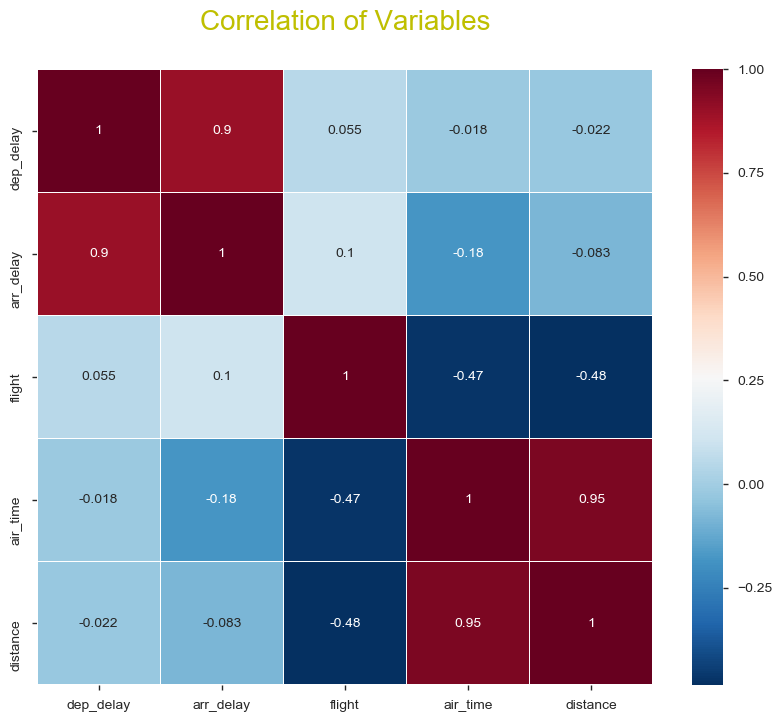

In [22]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Variables', y=1.05, size=20, color='Y')
sns.heatmap(flights.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=plt.cm.RdBu_r, linecolor='white', annot=True)
plt.show()

In [23]:
df = flights
df1 = flights

### Lets start diving into the data and get some insights

# 1. Busiest airport in terms of departures

In [24]:
air_busy = flights.groupby(['origin'])['origin'].count()
air_busy

origin
EWR    120835
JFK    111279
LGA    104662
Name: origin, dtype: int64

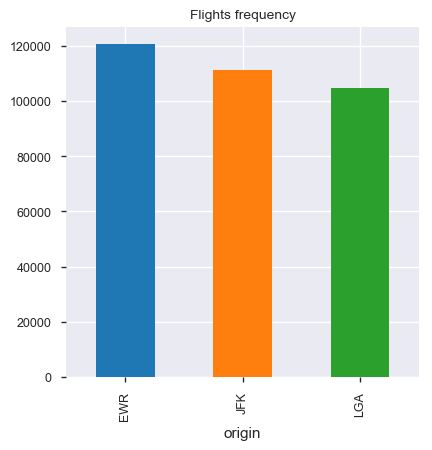

In [25]:
fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(221)
ax.set_title("Flights frequency", fontsize=10);
air_busy.plot(kind='bar', ax=ax,  legend=False, fontsize=9)
plt.show()

To conclude, airport EWR has the most no of departures in 2013

   # Departure Delay Analysis

## 1. Departure Status

In [26]:

depStatus = flights.groupby('dep_status')['dep_status'].count()
depStatus

dep_status
Canceled      8255
Late        128432
OnTime      200089
Name: dep_status, dtype: int64

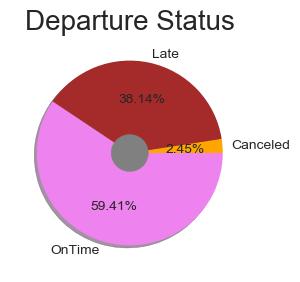

In [27]:
# Plotting a pie chart to understand the percentage of On time,Later and cancelled departures
fig = plt.figure(figsize=[3, 3])
ax = fig.add_subplot(111)
ax.pie(depStatus, labeldistance=1.1, labels=depStatus.index,autopct='%1.2f%%', shadow=True, colors=['orange','brown','violet'])
ax.set_title("Departure Status", fontsize=20);
plt.gcf().gca().add_artist(plt.Circle( (0,0), 0.2, color='grey'))
plt.show()

Conclusion - Among  336776 flights, 128432(38.1%) were delayed

## 2. Best Airports w.r.t Departure delay percentage 

In [28]:
# Creating a dataframe that has source airports and their total departures
depPerOrigin = flights.groupby('origin')['origin'].count().reset_index(name='total')
delayedFlights = flights.loc[flights['dep_status'] == 'Late'].groupby(['origin','dep_status'])['dep_status'].count().unstack('dep_status')

depPerOrigin['late'] = delayedFlights['Late'].values
depPerOrigin['percentage'] = (depPerOrigin['late']/depPerOrigin['total'])*100
depPerOrigin.set_index('origin', inplace=True)
depPerOrigin

,total,late,percentage
origin,,,
EWR,120835,52711,43.622295
JFK,111279,42031,37.770828
LGA,104662,33690,32.189333


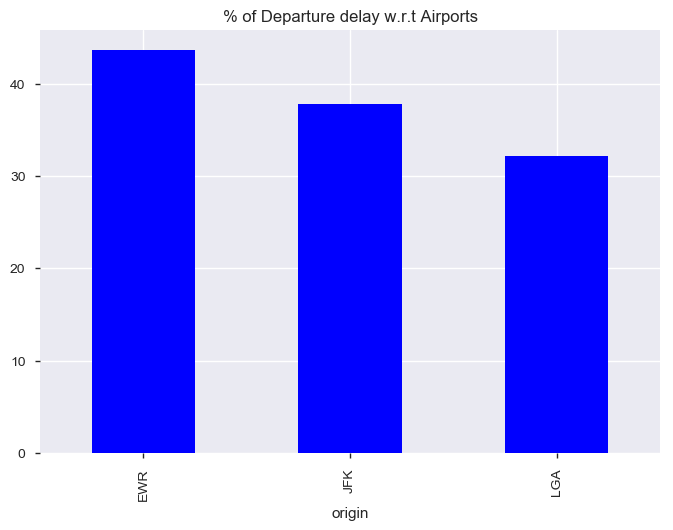

In [29]:
depPerOrigin['percentage'].plot(kind ='bar', title ="% of Departure delay w.r.t Airports",color='blue')
plt.show()

LGA is best airport with 32% of flights departured late and EWR has recorded worst percentage 43.6% in 2013

## 3. Best carriers w.r.t Departure delays

In [30]:
depPerCarrier = flights.groupby('carrier')['carrier'].count().reset_index(name='total')
delayedFlights = flights.loc[flights['dep_status'] == 'Late'].groupby(['carrier','dep_status'])['dep_status'].count().unstack('dep_status')
depPerCarrier['late'] = delayedFlights['Late'].values
depPerCarrier['percentage'] = (depPerCarrier['late']/depPerCarrier['total'])*100
depPerCarrier.set_index('carrier', inplace=True)
depPerCarrier

,total,late,percentage
carrier,,,
9E,18460,7063,38.261105
AA,32729,10162,31.048917
AS,714,226,31.652661
B6,54635,21445,39.251396
DL,48110,15241,31.679485
EV,54173,23139,42.713160
F9,685,341,49.781022
FL,3260,1654,50.736196
HA,342,69,20.175439


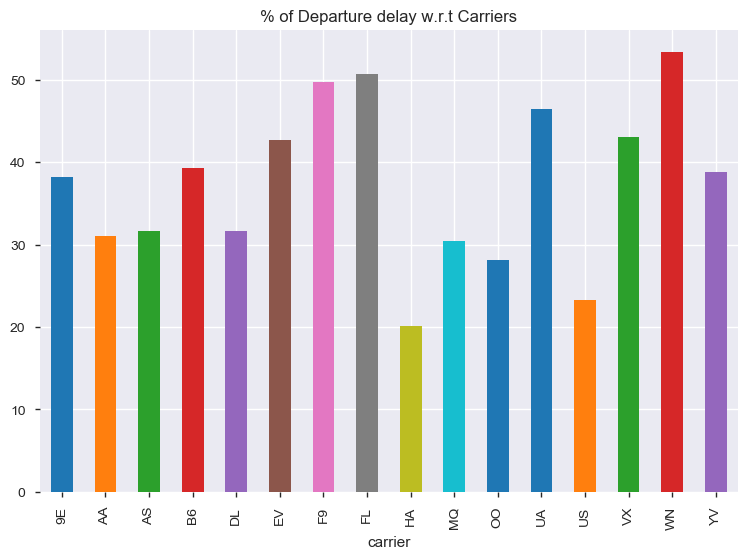

In [31]:
depPerCarrier['percentage'].plot(kind ='bar',figsize=[9,6], title = "% of Departure delay w.r.t Carriers")
plt.show()

## 4. Departure delay w.r.t to source and destinations

In [32]:
routeDelay = flights.loc[flights['dep_status'] == 'Late'].groupby(['origin','dest','dep_status'])['dep_status'].count().reset_index(name='total')
routeDelay.head()
#routeDelay[routeDelay.dest == 'LAX']
#routeDelay.loc[routeDelayind]
#routeDelay = routeDelay[routeDelay.groupby('origin')['total'].transform(max) == routeDelay['total']].sort_values('total')

,origin,dest,dep_status,total
0,EWR,ALB,Late,210
1,EWR,ANC,Late,6
2,EWR,ATL,Late,1808
3,EWR,AUS,Late,421
4,EWR,AVL,Late,83


In [33]:
highDelayRoute = routeDelay['total'].max()
highDelayRoute
routeDelay[routeDelay.total == highDelayRoute]


,origin,dest,dep_status,total
116,JFK,LAX,Late,4084


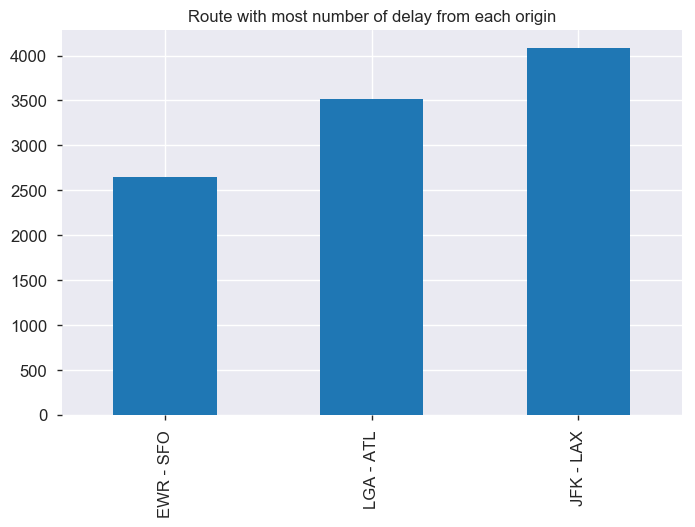

In [34]:
routeDelay = routeDelay[routeDelay.groupby('origin')['total'].transform(max) == routeDelay['total']].sort_values('total')
routeDelay.plot(kind='bar', figsize=[8,5], title ="Route with most number of delay from each origin",  legend=False, fontsize=12)
plt.gca().set_xticklabels(routeDelay['origin'].astype(str) + " - "+routeDelay['dest'].astype(str))
plt.show()

The route between JFX-LAX has recorded most number of delays

## Aircraft Speed Analysis

### 1. Fastest and Slowest flight

In [35]:
df3 = flights[flights.air_time != 0]
df3['speed'] = df3['distance']/(df3['air_time']/60)

In [36]:
MaxSpeed = df3['speed'].max()
MaxSpeed
df3[df3.speed == MaxSpeed]

,month,day,dep_delay,arr_delay,carrier,flight,origin,dest,air_time,distance,dep_time_new,arr_time_new,sched_dep_time_new,sched_arr_time_new,weekday,dep_status,arr_status,speed
222734,6,1,-3.0,-3.0,US,17,JFK,PHX,144.0,2153,16:26:00,18:50:00,16:29:00,18:53:00,Sunday,OnTime,OnTime,897.083333


In [37]:
MinSpeed = df3['speed'].min()
MinSpeed
df3[df3.speed == MinSpeed]

,month,day,dep_delay,arr_delay,carrier,flight,origin,dest,air_time,distance,dep_time_new,arr_time_new,sched_dep_time_new,sched_arr_time_new,weekday,dep_status,arr_status,speed
11245,1,13,40.0,40.0,EV,4519,EWR,BWI,1289.0,169,22:39:00,01:10:00,21:59:00,00:30:00,Sunday,Late,Late,7.866563


The flight no 17 departed from JFX to PHX travelled with highest speed of 897 MPH

The flight no 4519 departed from EWR to PHX travelled with lowest speed of 7.86 MPH

### 2. Best Carrier w.r.t Speed

In [38]:
flightSpeed = df3.groupby(['carrier'])['speed'].mean()
flightSpeed

carrier
9E    344.625846
AA    416.857053
AS    444.459187
B6    399.678786
DL    418.128015
EV    362.338709
F9    425.566706
FL    393.730749
HA    480.357719
MQ    367.912746
OO    366.320085
UA    420.799192
US    341.580788
VX    446.195066
WN    400.254407
YV    331.664615
Name: speed, dtype: float64

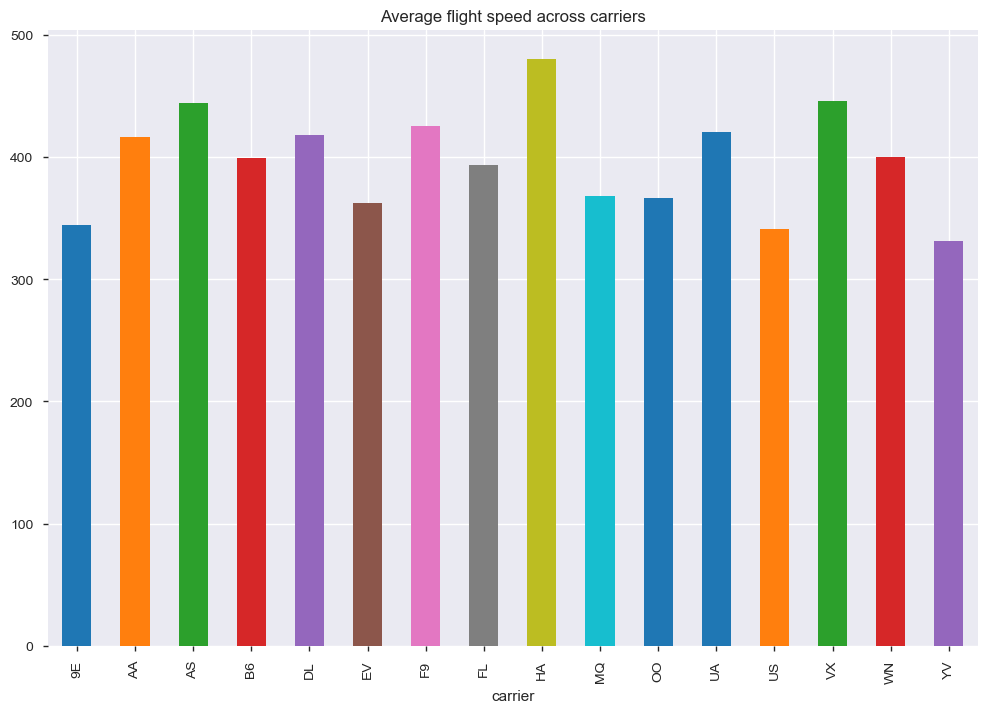

In [39]:
flightSpeed.plot(kind='bar', figsize=[12,8], title ="Average flight speed across carriers")
plt.show()

The Carrier HA is best in the business in terms of Speed

## Destination where maximum no of flights were arrived

In [40]:
destCounts = flights.groupby(['dest'])['dest'].count().reset_index(name='total')
destCounts.head()

,dest,total
0,ABQ,254
1,ACK,265
2,ALB,439
3,ANC,8
4,ATL,17215


In [41]:
maxiDest = destCounts['total'].max()
maxiDest
destCounts[destCounts.total == maxiDest]

,dest,total
69,ORD,17283


ORD is the Airport where maximum no of flights were arrived i.e 17283

## On Time Arrival Analysis

### 1. Arrival Status 

In [42]:
arrStatus = flights.groupby('arr_status')['arr_status'].count()
arrStatus

arr_status
Late      142231
OnTime    194545
Name: arr_status, dtype: int64

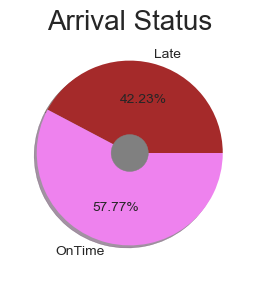

In [43]:
# Plotting a pie chart to understand the percentage of On time and Late arrivals
fig = plt.figure(figsize=[3, 3])
ax = fig.add_subplot(111)
ax.pie(arrStatus, labeldistance=1.1, labels=arrStatus.index,autopct='%1.2f%%', shadow=True, colors=['brown','violet'])
ax.set_title("Arrival Status", fontsize=20);
plt.gcf().gca().add_artist(plt.Circle( (0,0), 0.2, color='grey'))
plt.show()

Conclusion - Among 336776 flights, 194545 (57.77%) arrived on time. 

### 2. Best airports w.r.t  On time Arrivals

In [50]:
# Creating a dataframe that has source airports and their total departures
arrPerDest = flights.groupby('dest')['dest'].count().reset_index(name='total')
print(arrPerDest.shape)
onTimeFlights = flights.loc[flights['arr_status'] == 'OnTime'].groupby(['dest','arr_status'])['arr_status'].count().unstack('arr_status')
#onTimeFlights.head()
newdf = arrPerDest.join(onTimeFlights, on='dest', how='inner')
newdf['percentage'] = (newdf['OnTime']/newdf['total'])*100
newdf[newdf.percentage == newdf['percentage'].min()]
newdf[newdf.percentage == newdf['percentage'].max()]


(105, 2)


,dest,total,OnTime,percentage
50,LEX,1,1,100.0


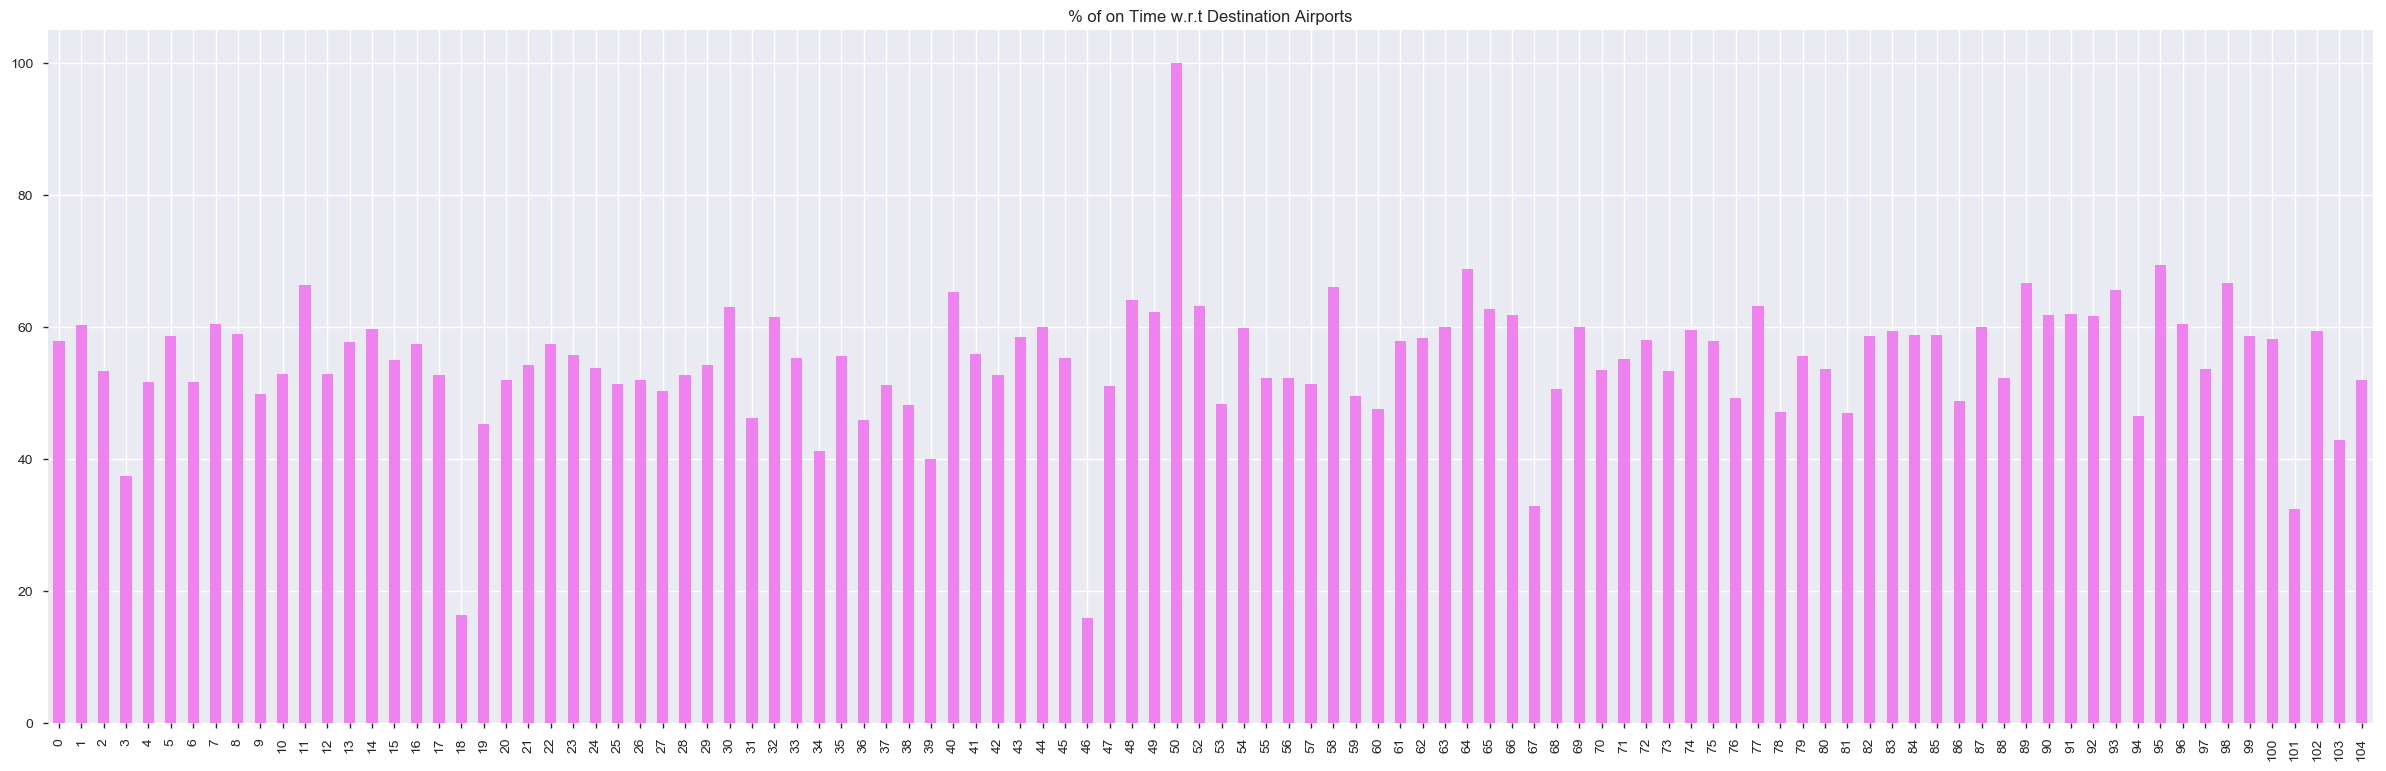

In [45]:
newdf['percentage'].plot(kind ='bar',figsize=[30,9], title ="% of on Time w.r.t Destination Airports",color='violet')
plt.show()

1. Among 25 arrivals at airport JAC, just 4 have reached on time and therefore recorded the poor arrival status in 2013
2. On the other hand, airport LEX has 100% on-time arrival.We could see only flight headed to LEX and landed on Time.

### 3. Carriers that arrived on Time

In [46]:
arrPerCarrier = flights.groupby('carrier')['carrier'].count().reset_index(name='total')
ontimeFlights = flights.loc[flights['arr_status'] == 'OnTime'].groupby(['carrier','arr_status'])['arr_status'].count().unstack('arr_status')
arrPerCarrier['ontime'] = ontimeFlights['OnTime'].values
arrPerCarrier['percentage'] = (arrPerCarrier['ontime']/arrPerCarrier['total'])*100
arrPerCarrier.set_index('carrier', inplace=True)
arrPerCarrier

,total,ontime,percentage
carrier,,,
9E,18460,10671,57.806067
AA,32729,21256,64.945461
AS,714,520,72.829132
B6,54635,30493,55.812208
DL,48110,31255,64.965704
EV,54173,26644,49.183172
F9,685,289,42.189781
FL,3260,1282,39.325153
HA,342,245,71.637427


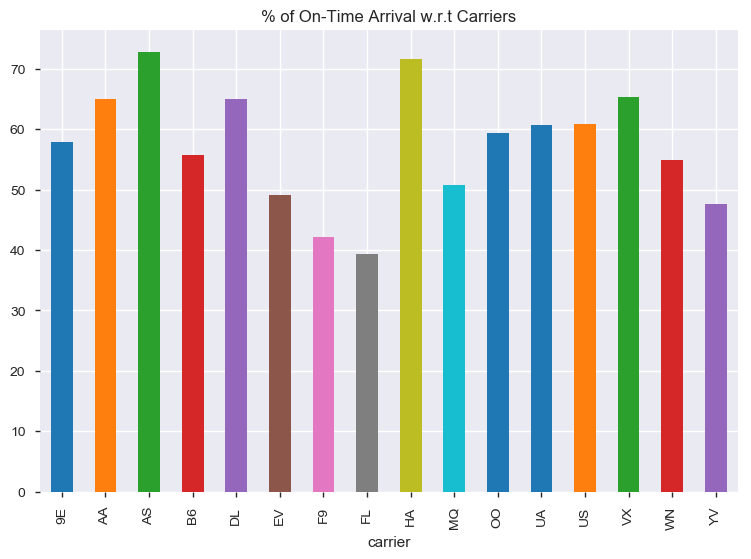

In [47]:
arrPerCarrier['percentage'].plot(kind ='bar',figsize=[9,6], title = "% of On-Time Arrival w.r.t Carriers")
plt.show()

Carrier AS is best in reaching destination on time